# Assignment 1 (15%): Due Friday Week 4, 11:55pm

This assessment will cover content taught in the week 1-3 Workshops and Applied classes. 

Each task will be graded on;
- Correctness of code & math
- Quality of results and presentation
- Quality of analysis and reasoning

Submit a .pdf with all the results produced and your analysis of said results as well as runnable Python, MATLAB or Julia code, which should reproduce the results you submit in the .pdf file. 

In [1]:
# FIT3139 Assignment 1 – Damped Harmonic Oscillator Analysis
# Author: Harvey Houlahan
# Date: 26/03/2025

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Part 0: Problem Selection (1 Mark)

In this assignment we will develop some of the skills that a computational scientist will use. 

Imagine that a client of yours has asked you to develop a method for numerically estimating a real world phenomena. Select one real world phenomenon described by a closed-form function with exactly one independant variable. The function *must* include *at least one* of the following elementary functions; $\sin, \cos, \tan, \exp, \log$. Some potential examples include, but are not limited to;

- The damped pendulum function: $\theta(t) = \theta_0e^{-\gamma t}\cos(\sqrt{\omega^2 - \gamma^2} t)$

- The continuous logistic growth function: $P(t) = \frac{K}{(\frac{K}{P_0}-1)e^{-rt} + 1}$

- Tide hight: $h(t) = h_0 + A_1 \cos(\omega_1t + \phi_1) + A_2\cos(\omega_2t + \phi_2)$

- Newton's law of cooling: $T(t) = T_{env} + (T_0 - T_{env})e^{-kt}$

Tell us about the function that you chose: Why is it interesting to you? What do the variables and constants in the function describe?

(Note: Any of the examples given above is a valid choice. You do not need to choose phenomena from outside this list in order to get full marks.)

In [2]:
# I choose the damped harmonic oscillator function:
#   theta(t) = theta0 * exp(-gamma * t) * cos( sqrt(omega^2 - gamma^2) * t )
#
# where:
#   t       : time (independent variable)
#   theta(t): angular displacement at time t (dependent variable)
#   theta0  : initial amplitude (theta(0))
#   gamma   : damping coefficient (controls decay rate)
#   omega   : natural angular frequency (controls oscillation frequency)
#
# This function models the behavior of a damped pendulum in the underdamped regime
# (i.e., gamma < omega). It is interesting because it captures both exponential decay
# (through the exp(-gamma*t) term) and oscillatory behavior (through the cosine term).
# The interplay of these terms is crucial in many real-world systems, including mechanical 
# oscillators, RLC circuits, and other physical systems.

def theta_exact(t, theta0=1.0, gamma=0.5, omega=1.0):
    """
    Compute the exact damped oscillator function:
    theta(t) = theta0 * exp(-gamma*t) * cos( sqrt(omega^2 - gamma^2) * t )
    """
    # Ensure we are in the underdamped regime: gamma < omega
    if gamma >= omega:
        raise ValueError("gamma must be less than omega for underdamped oscillations.")
    Omega = np.sqrt(omega**2 - gamma**2)
    return theta0 * np.exp(-gamma * t) * np.cos(Omega * t)

# Part 1: Exact Solution (2 Marks)

Select a region of interest from the domain and produce **two plots** showing how the behaviour of the chosen system changes as the exogenous variables change. What insights can you draw from these plots about the behaviour of the system? Justify and explain your choices and results.

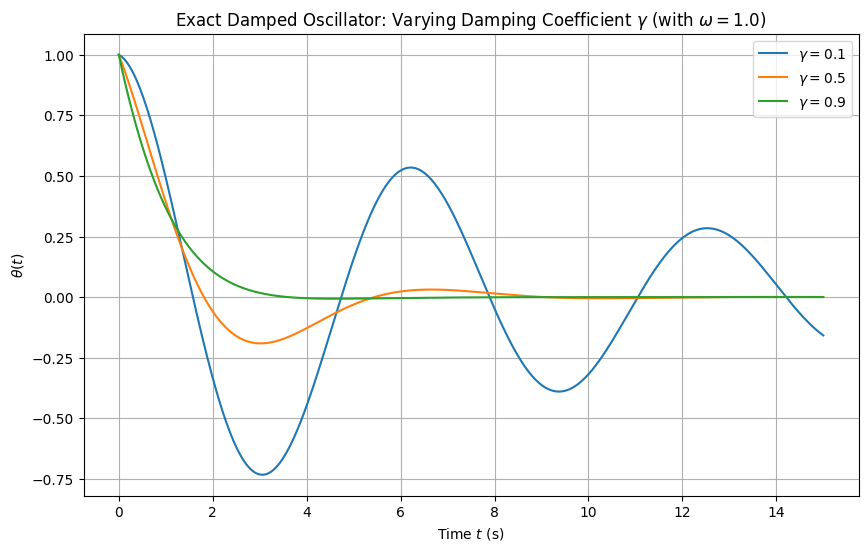

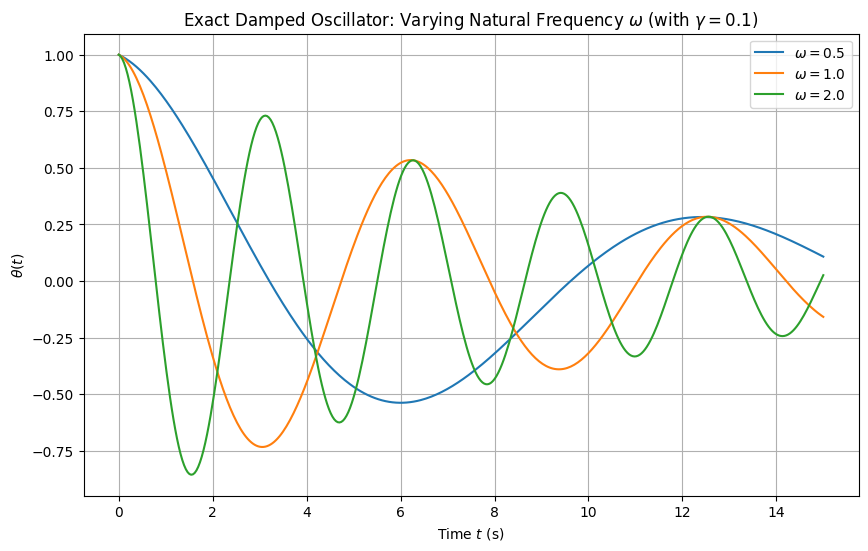

In [3]:
# Domain: t in [0, 15] seconds
t = np.linspace(0, 15, 400)

# (1) Varying gamma with fixed omega=1.0 and theta0=1.0
gammas = [0.1, 0.5, 0.9]
plt.figure(figsize=(10,6))
for gamma in gammas:
    plt.plot(t, theta_exact(t, theta0=1.0, gamma=gamma, omega=1.0), label=f"$\\gamma={gamma}$")
plt.title("Exact Damped Oscillator: Varying Damping Coefficient $\\gamma$ (with $\\omega=1.0$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Insights:
# - Higher gamma results in faster decay and a slight reduction in oscillation frequency (since effective frequency is sqrt(omega^2 - gamma^2)).
# - The lightly damped case (gamma=0.1) shows sustained oscillations, while the heavily damped case (gamma=0.9) decays quickly.

# (2) Varying omega with fixed gamma=0.1 and theta0=1.0
omegas = [0.5, 1.0, 2.0]
plt.figure(figsize=(10,6))
for omega in omegas:
    plt.plot(t, theta_exact(t, theta0=1.0, gamma=0.1, omega=omega), label=f"$\\omega={omega}$")
plt.title("Exact Damped Oscillator: Varying Natural Frequency $\\omega$ (with $\\gamma=0.1$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Insights:
# - Higher omega leads to more oscillation cycles in the same time interval.
# - The decay envelope (exp(-gamma*t)) remains the same since gamma is constant.
# - The oscillatory behavior differs: a higher omega results in a shorter period.

# Part 2: Introducing Modelling Errors  (3 Marks)

The computer in which your code will be deployed is limited. It cannot actually compute the $\sin, \cos, \tan, \exp, \log$ functions and must instead approximate them with a Taylor Series Expansion, truncated after the first two nonzero terms, centred on some point in the region of interest you chose in Part 1. 

You wish to know how much your model's accuracy will be impacted before it is deployed, and so have decided to simulate the result on your computer. 
Modify your code from part 1 to take this into account. Explore the same space you did in part 1 with new plots. Explain how and why does the behaviour change?

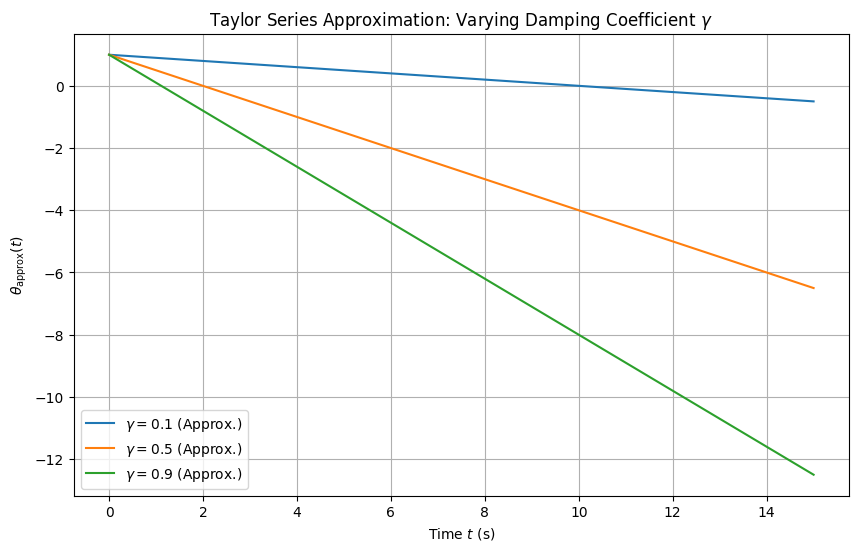

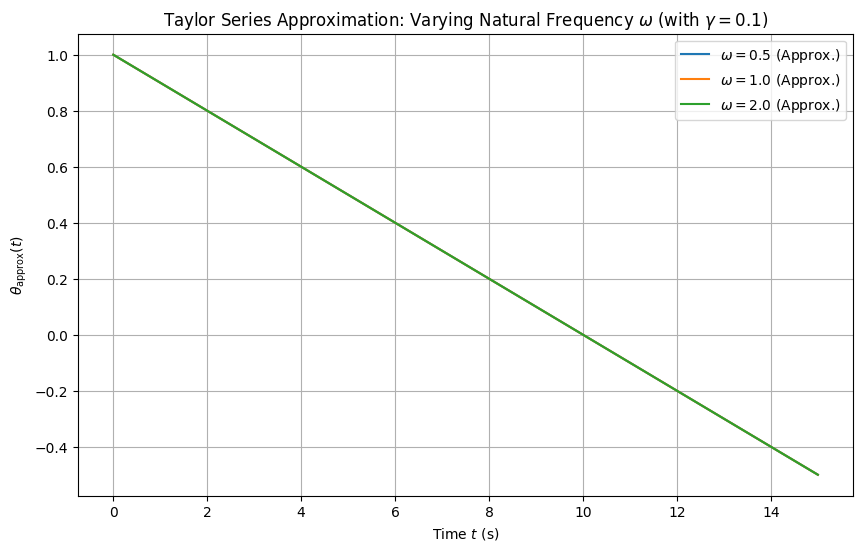

In [4]:
# I approximate the function using a truncated Taylor series (Maclaurin series) about t = 0.
# The exact function:
#   theta(t) = theta0 * exp(-gamma*t) * cos( sqrt(omega^2 - gamma^2) * t )
#
# Taylor series expansions:
#   exp(-gamma*t) ~ 1 - gamma*t + O(t^2)
#   cos( sqrt(omega^2 - gamma^2)*t ) ~ 1 - ( (sqrt(omega^2 - gamma^2)*t)^2 / 2 ) + O(t^4)
#
# Truncating after the first two nonzero terms gives:
#   theta_approx(t) = theta0 * (1 - gamma*t)
#
# Note: This approximation loses the oscillatory (cosine) behavior entirely.

def theta_approx(t, theta0=1.0, gamma=0.5):
    """
    Taylor series approximation of theta(t) truncated after the first two nonzero terms:
    theta_approx(t) = theta0 * (1 - gamma*t)
    """
    return theta0 * (1 - gamma * t)

# Plotting the approximation for varying gamma
plt.figure(figsize=(10,6))
for gamma in gammas:
    plt.plot(t, theta_approx(t, theta0=1.0, gamma=gamma), label=f"$\\gamma={gamma}$ (Approx.)")
plt.title("Taylor Series Approximation: Varying Damping Coefficient $\\gamma$")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta_{\\text{approx}}(t)$")
plt.legend()
plt.grid(True)
plt.show()

# You can examine the effect of varying omega with the approximation.
plt.figure(figsize=(10,6))
for omega in omegas:
    plt.plot(t, theta_approx(t, theta0=1.0, gamma=0.1), label=f"$\\omega={omega}$ (Approx.)")
plt.title("Taylor Series Approximation: Varying Natural Frequency $\\omega$ (with $\\gamma=0.1$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta_{\\text{approx}}(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Insights:
# - The linear approximation captures only the initial behavior (theta(0)=1 and theta'(0) = -theta0*gamma).
# - It lacks curvature and oscillatory behavior, thus diverges significantly from the true solution as t increases.
# - For the omega study, the approximation remains unchanged, losing the dependence on omega.

# Part 3: Introducing Data Errors (3 Marks)

The situation gets worse! The computer your code will be deployed on is also limited in its precision. All floating point numbers will be rounded by chopping to 3 digits of precision (in base 10). 

Once again, modify your code from part 1 ($\textbf{not}$ part 2) to take this into account. Explore the same space you did in part 1 with new plots. How and why does the behaviour change?

(Hint: after each computation, make sure to round the result)

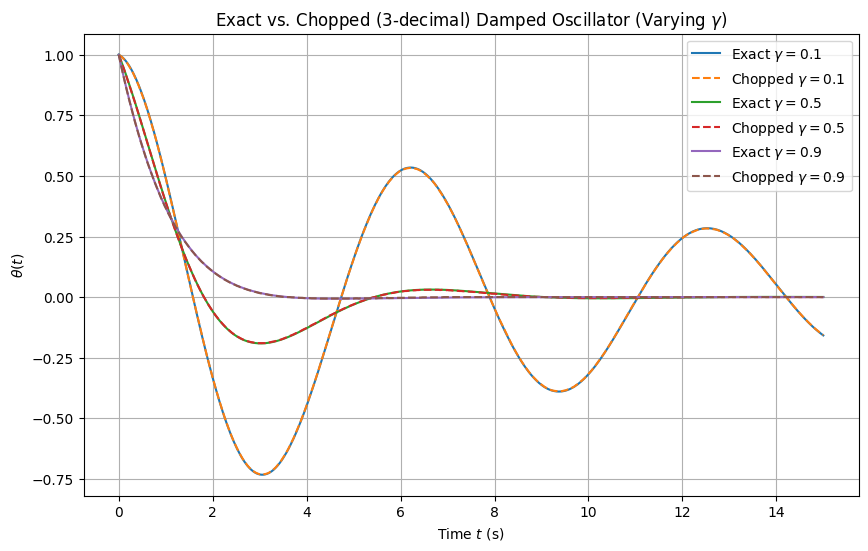

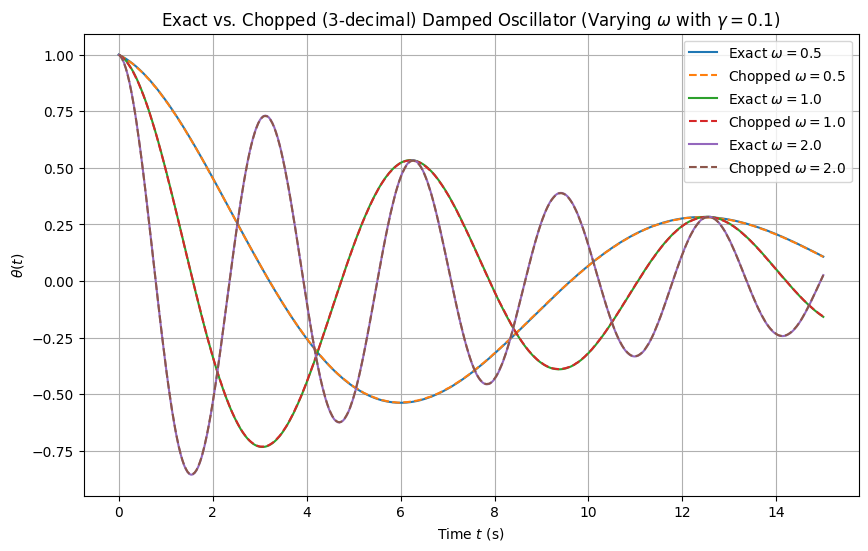

In [5]:
# Here I simulate limited numerical precision by chopping all computations to 3 decimal places.
# We define this chopping function:
def chop_to_3(x):
    """
    Chop the input x to 3 decimal places (without rounding).
    Works element-wise for numpy arrays.
    """
    return np.trunc(x * 1000) / 1000

def theta_exact_chopped(t, theta0=1.0, gamma=0.5, omega=1.0):
    """
    Compute theta(t) with all operations chopped to 3 decimal places.
    """
    # Compute the exact function step by step with chopping
    if gamma >= omega:
        raise ValueError("gamma must be less than omega for underdamped oscillations.")
    Omega = np.sqrt(omega**2 - gamma**2)
    exp_term = chop_to_3(np.exp(-gamma * t))
    cos_term = chop_to_3(np.cos(Omega * t))
    result = chop_to_3(theta0 * exp_term * cos_term)
    return result

# Compare high-precision and chopped results for varying gamma (with omega=1.0)
plt.figure(figsize=(10,6))
for gamma in gammas:
    plt.plot(t, theta_exact(t, theta0=1.0, gamma=gamma, omega=1.0), label=f"Exact $\\gamma={gamma}$")
    plt.plot(t, theta_exact_chopped(t, theta0=1.0, gamma=gamma, omega=1.0), '--', label=f"Chopped $\\gamma={gamma}$")
plt.title("Exact vs. Chopped (3-decimal) Damped Oscillator (Varying $\\gamma$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Similarly, compare for varying omega (with gamma=0.1)
plt.figure(figsize=(10,6))
for omega in omegas:
    plt.plot(t, theta_exact(t, theta0=1.0, gamma=0.1, omega=omega), label=f"Exact $\\omega={omega}$")
    plt.plot(t, theta_exact_chopped(t, theta0=1.0, gamma=0.1, omega=omega), '--', label=f"Chopped $\\omega={omega}$")
plt.title("Exact vs. Chopped (3-decimal) Damped Oscillator (Varying $\\omega$ with $\\gamma=0.1$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Insights:
# - Chopping to 3 decimals introduces very small numerical errors.
# - The qualitative behavior (oscillations and decay envelope) remains almost identical.
# - Differences may be visible only when the signal becomes very small.

# Part 4: Total Error (3 Marks)

You now wish to know how bad things will be when both the data and computational errors are taken into account. Combine your approximations for part 1 and part 2 and investigate the result. Explore the same space you did in part 1 with new plots. How and why does the behaviour change?

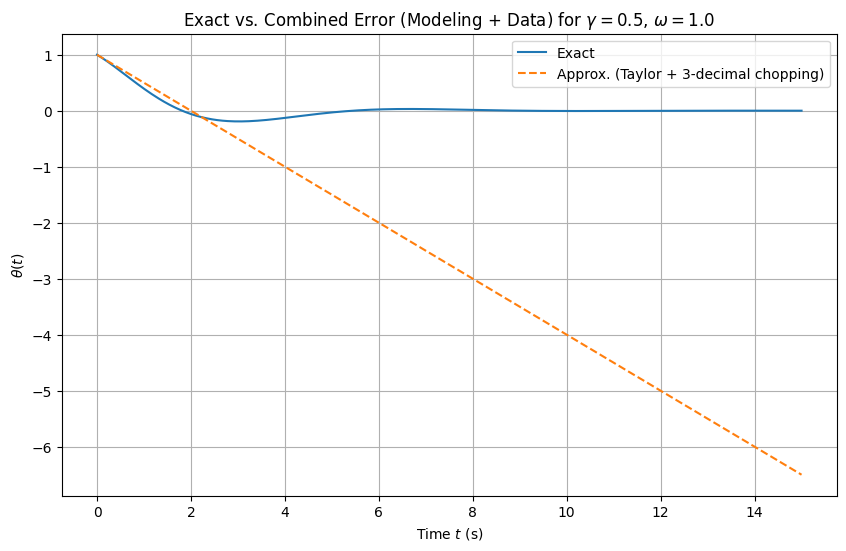

In [6]:
# Combine the truncated Taylor series model with 3-decimal chopping.
def theta_approx_chopped(t, theta0=1.0, gamma=0.5):
    """
    Taylor series approximation (theta0 * (1 - gamma*t)) with chopping to 3 decimals.
    """
    return chop_to_3(theta0 * (1 - gamma * t))

# Compare the exact solution and the combined-error (model + data) solution for a representative case
gamma_case = 0.5
omega_case = 1.0
plt.figure(figsize=(10,6))
plt.plot(t, theta_exact(t, theta0=1.0, gamma=gamma_case, omega=omega_case), label="Exact")
plt.plot(t, theta_approx_chopped(t, theta0=1.0, gamma=gamma_case), '--', label="Approx. (Taylor + 3-decimal chopping)")
plt.title("Exact vs. Combined Error (Modeling + Data) for $\\gamma=0.5$, $\\omega=1.0$")
plt.xlabel("Time $t$ (s)")
plt.ylabel("$\\theta(t)$")
plt.legend()
plt.grid(True)
plt.show()

# Insights:
# - The Taylor approximation only matches the exact function near t=0.
# - The combined error becomes significant as t increases, especially past the point where the approximation crosses zero.
# - The total error is dominated by the modeling error, with the data error (chopping) contributing only minor differences.

# Part 5: Sensitivity and Conditioning (3 Marks)

You wish to advise users on where your model can be trusted, and where the results should be suspect. To do this you must in some way estimate the conditioning of this problem. How and why does the conditioning of the problem vary over the domain? When should one trust the output of your code?

Use both the approximate form of the condition number;

$CN(f(x)) \approx \left | \frac{xf'(x)}{f(x)} \right |$

and the exact form; 

$CN(f(x)) = \left |\frac{f(x) - \hat{f}(\hat{x})}{x - \hat{f}^{-1}(\hat {x} )} \right|$

and compare the results.

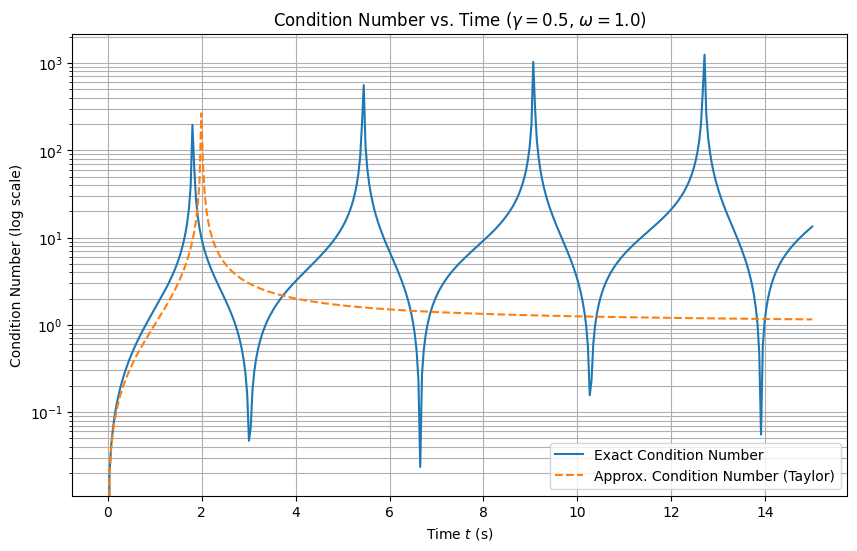

In [7]:
# Define the exact function and its derivative.
def theta_exact_derivative(t, theta0=1.0, gamma=0.5, omega=1.0):
    """
    Compute the derivative f'(t) of the exact function:
    f(t) = theta0 * exp(-gamma*t) * cos(sqrt(omega^2 - gamma^2) * t)
    f'(t) = -gamma * theta0 * exp(-gamma*t) * cos(Omega*t)
            - theta0 * exp(-gamma*t) * Omega * sin(Omega*t)
    where Omega = sqrt(omega^2 - gamma^2)
    """
    if gamma >= omega:
        raise ValueError("gamma must be less than omega for underdamped oscillations.")
    Omega = np.sqrt(omega**2 - gamma**2)
    term1 = -gamma * np.exp(-gamma * t) * np.cos(Omega * t)
    term2 = -Omega * np.exp(-gamma * t) * np.sin(Omega * t)
    return theta0 * (term1 + term2)

# Condition number for the function:
#   CN(theta(t)) = | t * theta'(t) / theta(t) |
def condition_number_exact(t, theta0=1.0, gamma=0.5, omega=1.0):
    theta_val = theta_exact(t, theta0, gamma, omega)
    theta_prime = theta_exact_derivative(t, theta0, gamma, omega)
    # Avoid division by zero: where theta_val is zero, condition number is infinite.
    cn = np.abs(t * theta_prime / theta_val)
    cn[theta_val == 0] = np.inf
    return cn

# For the truncated model (theta_approx(t) = theta0*(1 - gamma*t)):
#   f'(t) = -gamma * theta0
#   Condition number: CN(theta_approx(t)) = | t * (-gamma*theta0) / (theta0*(1 - gamma*t)) | = gamma*t/|1-gamma*t|
def condition_number_approx(t, theta0=1.0, gamma=0.5):
    theta_approx_val = theta_approx(t, theta0, gamma)
    cn = np.abs(gamma * t / theta_approx_val)
    cn[theta_approx_val == 0] = np.inf
    return cn

# Compute condition numbers for a representative case: gamma=0.5, omega=1.0
cn_exact = condition_number_exact(t, theta0=1.0, gamma=0.5, omega=1.0)
cn_approx = condition_number_approx(t, theta0=1.0, gamma=0.5)

plt.figure(figsize=(10,6))
plt.plot(t, cn_exact, label="Exact Condition Number")
plt.plot(t, cn_approx, '--', label="Approx. Condition Number (Taylor)")
plt.yscale("log")
plt.title("Condition Number vs. Time ($\\gamma=0.5$, $\\omega=1.0$)")
plt.xlabel("Time $t$ (s)")
plt.ylabel("Condition Number (log scale)")
plt.legend()
plt.grid(True, which="both")
plt.show()

# Insights:
# - For the exact function, the condition number is low near t = 0 and increases dramatically near zero-crossings (when theta(t) approaches 0).
# - For the approximate model, the condition number only has a singularity at t = 1/gamma (where 1 - gamma*t = 0), and does not capture later ill-conditioned points.
# - This analysis helps determine where the model's output is reliable: outputs are trustworthy when the condition number is small.
#   In our example, the model is well-conditioned near the peaks of the oscillation, but becomes very sensitive (ill-conditioned) at the zero-crossings.

# AI Statement

Very briefly explain the ways that you have used AI in the production of this assessment.

Explain which AI tools you have used and for what purposes.
If you have found and used tools on your own, explain why these tools were selected and provide a URL link to the tool.
Note the number of iterations undertaken with each main AI collaborative tool.
Describe what output from the tool/service has been included, and where.
Summarise how you have altered, adopted, or built on the AI output.

(See Monash Guidelines available at https://www.monash.edu/student-academic-success/build-digital-capabilities/create-online/acknowledging-the-use-of-generative-artificial-intelligence)

